In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./data/raw/consumption_temp.csv')


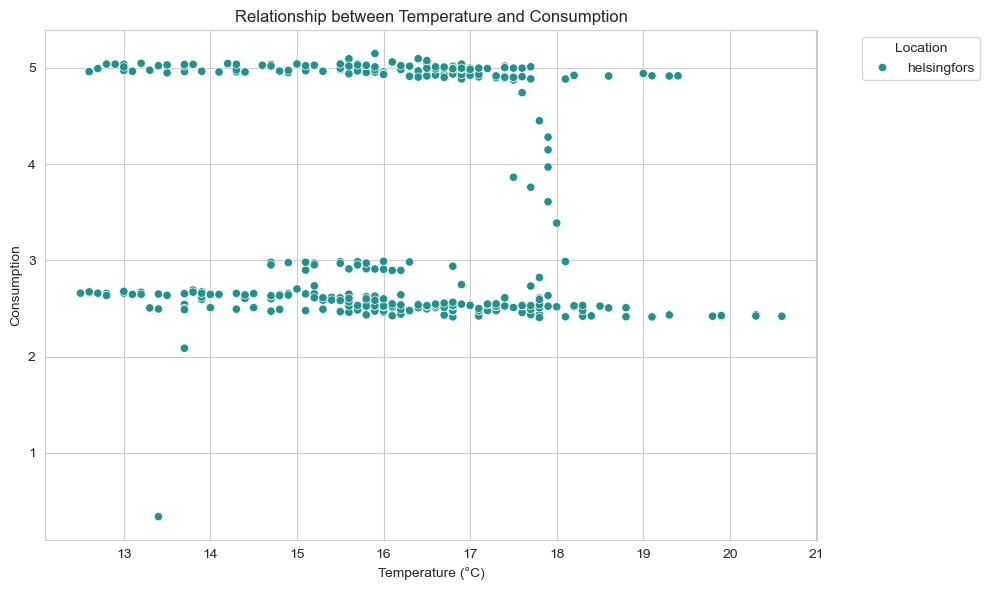

0.00248202301359702


In [9]:
### Some data cleaning...
# Due to the temporal nature of the data, we fill null values for Helsingfors' 
# consumption 
# Convert 'time' to datetime
df['time'] = pd.to_datetime(df['time'])

### CHECK LINEAR RELATIONSHIP BETWEEN TEMPERATURE AND CONSUMPTION ###

# Set aesthetic style of the plots
sns.set_style("whitegrid")

df = df[df['location'] == 'helsingfors']
# All 0.0 values can be found in the summer, remove null values to check
# linear relationship between temperature and consumption in Helsingfors
df = df[df['consumption'] != 0.0]

# Filter for only summer months (June, July, August) or July specifically
df = df[df['time'].dt.month.isin([7])]

# Initialize a figure
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(data=df, x='temperature', y='consumption', hue='location', palette='viridis')

# Title and labels
plt.title('Relationship between Temperature and Consumption')
plt.xlabel('Temperature (°C)')
plt.ylabel('Consumption')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

# Looking at all data: -0.6006142130246995
# Looking only at summer seasonal data for Helsingfors: 0.3554700122738987
# Only for July: 0.002482023013597065
# Ergo, not really a linear relationship.. or not only between temperature and 
# consumption
# However, we do not have access to previous consumption data for these 0.0 
# values
# Best course of action may therefore be to forward fill using the consumption 
# same time the week after
correlation = df['temperature'].corr(df['consumption'])
print(correlation)


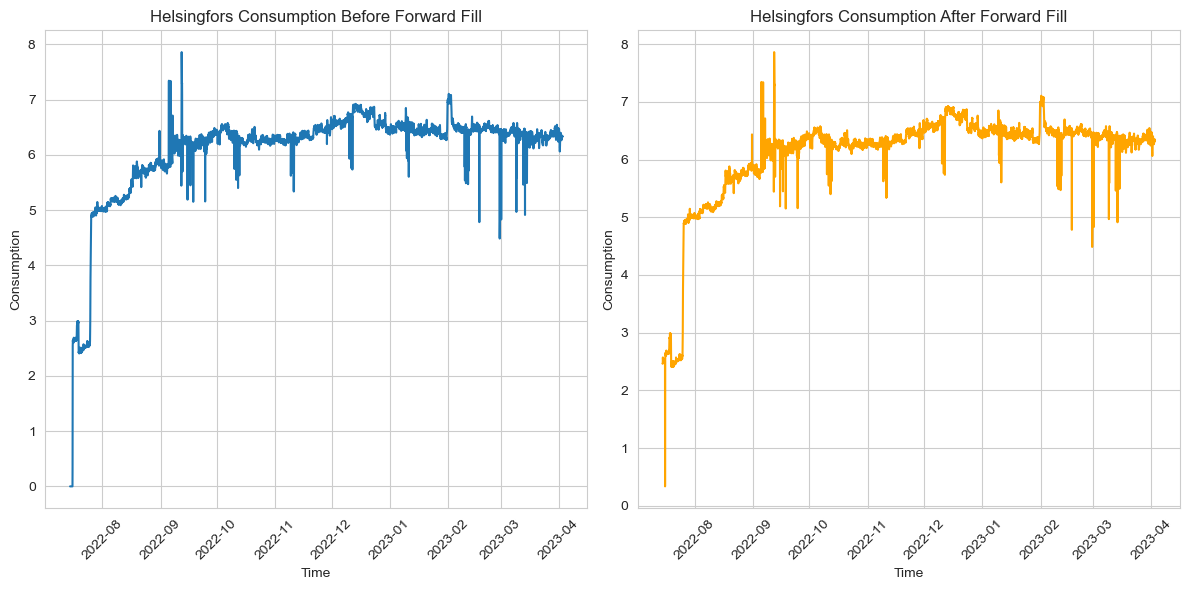

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load data
df = pd.read_csv('./data/raw/consumption_temp.csv')

# Convert 'date' column to datetime and set as index (replace 'date' with your actual date column name)
df['date'] = pd.to_datetime(df['time'])
df.set_index('date', inplace=True)

# Extract Helsingfors data before forward fill
helsingfors_before = df[df['location'] == 'helsingfors']

# Apply forward fill
df['consumption'] = df.groupby('location')['consumption'].transform(lambda x: x.replace(0.0, np.nan))
df['consumption'] = df.groupby('location')['consumption'].transform(lambda x: x.fillna(x.shift(-168)))

# Extract Helsingfors data after forward fill
helsingfors_after = df[df['location'] == 'helsingfors']

# Plotting
plt.figure(figsize=(12, 6))

# Plot Before Forward Fill
plt.subplot(1, 2, 1)
plt.plot(helsingfors_before['consumption'])
plt.title('Helsingfors Consumption Before Forward Fill')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formatting x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to months
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Plot After Forward Fill
plt.subplot(1, 2, 2)
plt.plot(helsingfors_after['consumption'], color='orange')
plt.title('Helsingfors Consumption After Forward Fill')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
